In [51]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as dt
import random
from datetime import date, timedelta

#### Read CSV from API data

In [28]:
event_df = pd.read_csv("Food_analysis.csv")
event_df

,Date,Year,Month,Product,Reactions,Number of Reactions,Outcome,Number of Outcomes,Gender,Age,Age Bin,Age Groups
0,2008-01-05,2008,1,Nuts/Edible Seed,"['FEELING OF BODY TEMPERATURE CHANGE', 'PYREXI...",8,"['Patient Visited ER', 'Life Threatening', 'Pa...",4,Male,6,0-20,Age <20
1,2008-01-05,2008,1,Vit/Min/Prot/Unconv Diet(Human/Animal),"['PHARYNGITIS', 'NASOPHARYNGITIS']",2,[],0,Female,56,41-60,Age (41-60)
2,2008-01-05,2008,1,Vit/Min/Prot/Unconv Diet(Human/Animal),"['CONSTIPATION', 'SYNCOPE', 'PRURITUS', 'BLOOD...",8,"['Other Serious (Important Medical Events)', '...",2,Male,76,61-80,Age (61-80)
3,2008-01-08,2008,1,Vit/Min/Prot/Unconv Diet(Human/Animal),"['OPERATIVE HAEMORRHAGE', 'BLOOD IRON DECREASE...",3,"['Medically Important', 'Other Serious (Import...",3,Male,69,61-80,Age (61-80)
4,2008-01-11,2008,1,Vit/Min/Prot/Unconv Diet(Human/Animal),"['POOR QUALITY SLEEP', 'CONSTIPATION', 'EMOTIO...",6,"['Medically Important', 'Required Intervention']",2,Male,52,41-60,Age (41-60)
5,2008-01-12,2008,1,Bakery Prod/Dough/Mix/Icing,"['DEHYDRATION', 'NAUSEA', 'DIARRHOEA', 'VOMITI...",4,['Patient Visited Healthcare Provider'],1,Female,11,0-20,Age <20
6,2008-01-12,2008,1,Bakery Prod/Dough/Mix/Icing,"['DEHYDRATION', 'NAUSEA', 'DIARRHOEA', 'VOMITI...",4,['Patient Visited Healthcare Provider'],1,Female,14,0-20,Age <20
7,2008-01-12,2008,1,Vit/Min/Prot/Unconv Diet(Human/Animal),"['GASTROINTESTINAL OBSTRUCTION', 'ABDOMINAL PA...",2,"['Other Serious (Important Medical Events)', '...",2,Female,44,41-60,Age (41-60)
8,2008-01-12,2008,1,Bakery Prod/Dough/Mix/Icing,"['DEHYDRATION', 'NAUSEA', 'DIARRHOEA', 'VOMITI...",4,[],0,Female,49,41-60,Age (41-60)
9,2008-01-12,2008,1,Vit/Min/Prot/Unconv Diet(Human/Animal),"['CHROMATURIA', 'MALAISE', 'BACK PAIN']",3,['Medically Important'],1,Male,25,21-40,Age (21-40)


#### Plan data to be plotted

In [29]:
age_groups = event_df.groupby(["Age Bin"]).count()
age_groups

,Date,Year,Month,Product,Reactions,Number of Reactions,Outcome,Number of Outcomes,Gender,Age,Age Groups
Age Bin,,,,,,,,,,,
0-20,714,714,714,714,714,714,714,714,714,714,712
21-40,1389,1389,1389,1389,1389,1389,1389,1389,1389,1389,1389
41-60,1685,1685,1685,1685,1685,1685,1685,1685,1685,1685,1685
61-80,1206,1206,1206,1206,1206,1206,1206,1206,1206,1206,1206
81-100,341,341,341,341,341,341,341,341,341,341,341
>100,2,2,2,2,2,2,2,2,2,2,2


In [30]:
age_df = age_groups.filter(['Age Bin','Age'], axis=1)
#  Rename the "Age" column "Quantity"
age_df= age_df.rename(columns={'Age': 'Quantity'})
age_df

,Quantity
Age Bin,
0-20,714
21-40,1389
41-60,1685
61-80,1206
81-100,341
>100,2


In [31]:
Year = event_df['Year'].value_counts()
Year

2017    772
2015    729
2014    710
2016    614
2013    602
2012    531
2011    401
2010    366
2009    352
2008    260
Name: Year, dtype: int64

In [138]:
#Outcome_Year = event_df['Year']['Outcome'].value_counts()
#Outcome_Year = event_df.groupby("Outcome")["Reactions"].count()
#Outcome_Year

Outcome
['Congenital Anomaly']                                                                                                                                     1
['Death', 'Hospitalization', 'Patient Visited Healthcare Provider']                                                                                        1
['Death', 'Hospitalization']                                                                                                                              14
['Death', 'Life Threatening', 'Hospitalization']                                                                                                           3
['Death', 'Patient Visited Healthcare Provider']                                                                                                           9
['Death', 'Required Intervention', 'Hospitalization', 'Patient Visited Healthcare Provider']                                                               1
['Death', 'Required Intervention', 'Hospitalizatio

In [139]:
count_outcomes = event_df['Number of Outcomes'].value_counts()
count_outcomes

1    2478
2    1388
0     967
3     398
4      87
5      13
6       5
7       1
Name: Number of Outcomes, dtype: int64

In [140]:
count_reactions = event_df['Number of Reactions'].value_counts()
count_reactions

1     1213
2     1107
3      838
4      629
5      449
6      363
7      221
8      164
9      108
10      75
11      44
12      31
13      27
14      23
16       9
15       7
18       6
17       5
21       4
20       4
19       3
0        2
22       2
30       1
38       1
23       1
Name: Number of Reactions, dtype: int64

In [32]:
Month = event_df['Month'].value_counts()
Month

7     521
9     495
12    462
4     461
6     452
1     451
10    437
8     434
11    423
5     423
2     390
3     388
Name: Month, dtype: int64

In [33]:
Gender = event_df['Gender'].value_counts()
Gender

Female    3573
Male      1764
Name: Gender, dtype: int64

In [34]:
Product = event_df['Product'].value_counts()
Product

Vit/Min/Prot/Unconv Diet(Human/Animal)          2953
Cosmetics                                        958
Vegetables/Vegetable Products                    189
Nuts/Edible Seed                                 127
Fishery/Seafood Prod                             122
Dietary Conventional Foods/Meal Replacements     102
Bakery Prod/Dough/Mix/Icing                       94
Baby Food Products                                93
Cereal Prep/Breakfast Food                        82
Soft Drink/Water                                  79
Fruit/Fruit Prod                                  75
Milk/Butter/Dried Milk Prod                       69
Snack Food Item                                   57
Mult Food Dinner/Grav/Sauce/Special               45
Coffee/Tea                                        31
G Medical Foods, N.E.C.                           30
Ice Cream Prod                                    26
Whole Grain/Milled Grain Prod/Starch              23
Candy W/O Choc/Special/Chew Gum               

In [86]:
Outcomes = event_df['Outcome'].value_counts()
Outcomes

['Medically Important']                                                                                                                                               1384
[]                                                                                                                                                                     967
['Hospitalization']                                                                                                                                                    368
['Medically Important', 'Patient Visited Healthcare Provider']                                                                                                         319
['Patient Visited ER', 'Medically Important']                                                                                                                          216
['Patient Visited Healthcare Provider']                                                                                                          

In [99]:
Reactions = event_df['Reactions'].value_counts()
Reactions

['ALOPECIA']                                                                                                                                                                                                                                                                                                                87
['CHOKING']                                                                                                                                                                                                                                                                                                                 70
['VOMITING']                                                                                                                                                                                                                                                                                                                53
['Ovarian cancer']                         

### Plotting Data

#### Number of Reactions each patient reports

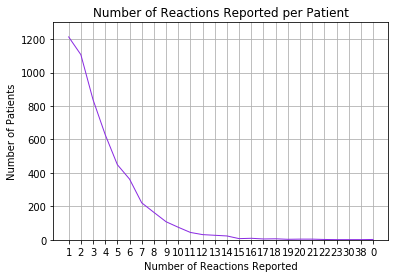

In [159]:
y = 1213, 1107, 838, 629, 449, 363, 221, 164, 108, 75, 44, 31, 27, 23, 7, 9, 5, 6, 3, 4, 4, 2, 1, 1, 1, 2
x = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "30", "38", "0"]
plt.ylim(0,1300)
plt.plot(x, y, color="blueviolet", linewidth=1, label="Reactions")
plt.xlabel("Number of Reactions Reported")
plt.ylabel("Number of Patients")
plt.title("Number of Reactions Reported per Patient")
plt.grid()
plt.savefig("Reactions_Incidents.png")
plt.show()

#### Number of Outcomes each patient reports

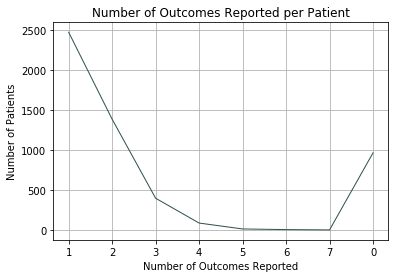

In [160]:
y = 2478, 1388, 398, 87, 13, 5, 1, 967
x= ["1", "2", "3", "4", "5", "6", "7", "0"]
#plt.ylim(200,800)
plt.plot(x, y, color="darkslategray", linewidth=1, label="Outcomes")
plt.xlabel("Number of Outcomes Reported")
plt.ylabel("Number of Patients")
plt.title("Number of Outcomes Reported per Patient")
plt.grid()
plt.savefig("Outcomes_Incident.png")
plt.show()

#### Type of Reactions

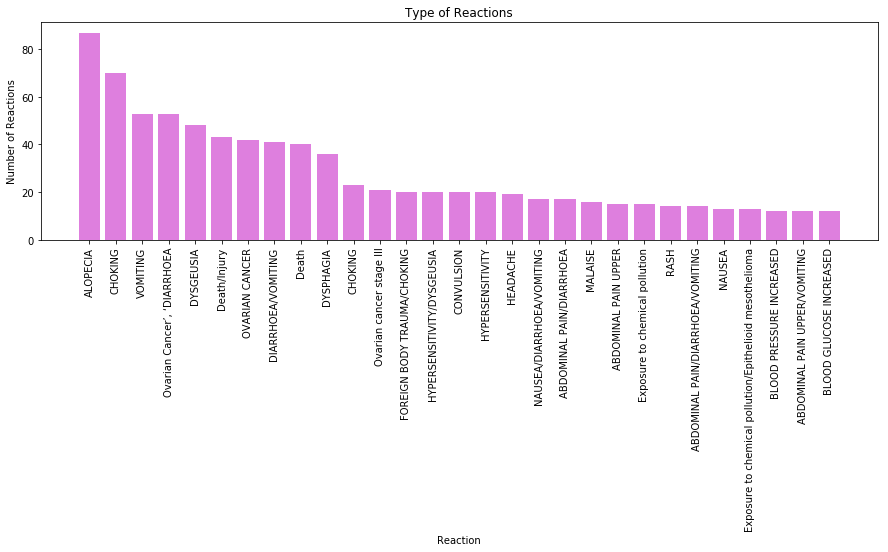

In [134]:
reactions_type = event_df.groupby(["Reactions"]).count()
reaction_groups = ['ALOPECIA', 'CHOKING', 'VOMITING', 'Ovarian Cancer’, ‘DIARRHOEA','DYSGEUSIA', 'Death/Injury', 
          'OVARIAN CANCER', 'DIARRHOEA/VOMITING', 'Death', 'DYSPHAGIA', 'CHOKING', 'Ovarian cancer stage III', 
          'FOREIGN BODY TRAUMA/CHOKING', 'HYPERSENSITIVITY/DYSGEUSIA', 'CONVULSION', 'HYPERSENSITIVITY', 
          'HEADACHE', 'NAUSEA/DIARRHOEA/VOMITING', 'ABDOMINAL PAIN/DIARRHOEA', 'MALAISE', 
          'ABDOMINAL PAIN UPPER', 'Exposure to chemical pollution', 'RASH', 'ABDOMINAL PAIN/DIARRHOEA/VOMITING', 
          'NAUSEA', 'Exposure to chemical pollution/Epithelioid mesothelioma', 'BLOOD PRESSURE INCREASED', 
          'ABDOMINAL PAIN UPPER/VOMITING', 'BLOOD GLUCOSE INCREASED', 'LIVER FUNCTION TEST ABNORMAL']
num_reactions = [87, 70, 53, 53, 48, 43, 42, 41, 40, 36, 23, 21, 20, 20, 20, 20, 19, 17, 17, 16, 15, 15, 14, 14, 
                 13, 13, 12, 12, 12]
x_axis = np.arange(len(num_reactions))
plt.figure(figsize=(15,4))
plt.bar(x_axis, num_reactions,  color="m", alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, reaction_groups, rotation="vertical")
plt.title("Type of Reactions")
plt.xlabel("Reaction")
plt.ylabel("Number of Reactions")
plt.savefig("Reaction_Type.png")
plt.show()


#### Reactions by Product

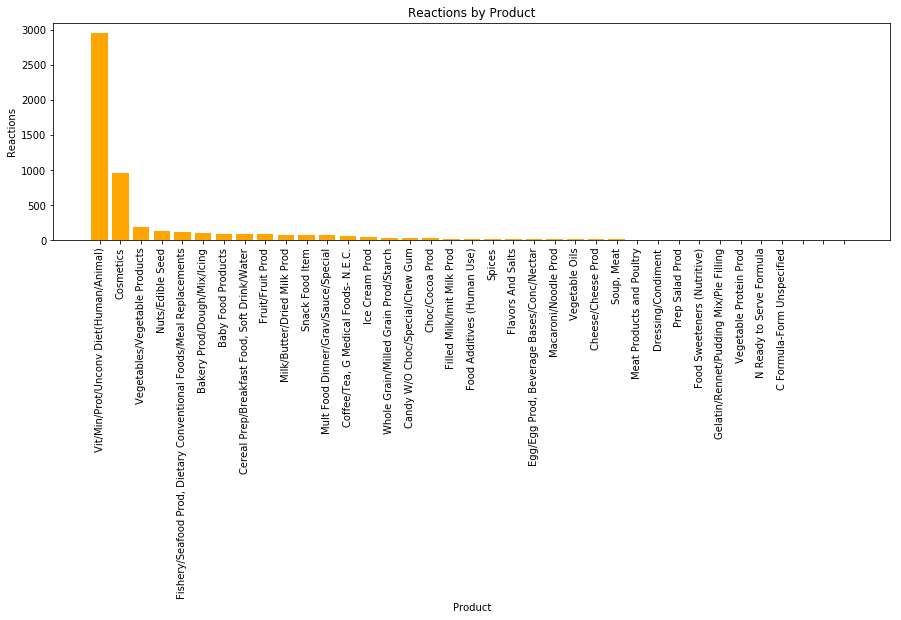

In [115]:
reactions_by_product = event_df.groupby(["Product"]).count()
product_groups = ["Vit/Min/Prot/Unconv Diet(Human/Animal)", "Cosmetics", "Vegetables/Vegetable Products", 
                  "Nuts/Edible Seed", "Fishery/Seafood Prod, Dietary Conventional Foods/Meal Replacements", 
                  "Bakery Prod/Dough/Mix/Icing", "Baby Food Products", "Cereal Prep/Breakfast Food, Soft Drink/Water", 
                  "Fruit/Fruit Prod", "Milk/Butter/Dried Milk Prod", "Snack Food Item", "Mult Food Dinner/Grav/Sauce/Special", 
                  "Coffee/Tea, G Medical Foods- N.E.C.", "Ice Cream Prod", "Whole Grain/Milled Grain Prod/Starch", 
                  "Candy W/O Choc/Special/Chew Gum", "Choc/Cocoa Prod", "Filled Milk/Imit Milk Prod", 
                  "Food Additives (Human Use)", "Spices", "Flavors And Salts", "Egg/Egg Prod, Beverage Bases/Conc/Nectar", 
                  "Macaroni/Noodle Prod", "Vegetable Oils", "Cheese/Cheese Prod", "Soup, Meat", 
                  "Meat Products and Poultry", "Dressing/Condiment", "Prep Salad Prod", "Food Sweeteners (Nutritive)", 
                  "Gelatin/Rennet/Pudding Mix/Pie Filling", "Vegetable Protein Prod", "N Ready to Serve Formula", 
                  "C Formula-Form Unspecified"]
num_reactions = [2953, 958, 189, 127, 122, 102, 94, 93, 82, 79, 75, 69, 57, 45, 31, 30, 26, 23, 22, 22, 15, 15, 14, 
                 13, 12, 10, 8, 8, 7, 7, 6, 6, 5, 5, 3, 2, 2]
x_axis = np.arange(len(num_reactions))
plt.figure(figsize=(15,4))
plt.bar(x_axis, num_reactions,  color="orange", alpha=1, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, product_groups, rotation="vertical")
plt.title("Reactions by Product")
plt.xlabel("Product")
plt.ylabel("Reactions")
plt.savefig("Reactions_Product.png")
plt.show()

#### Year of Reactions 

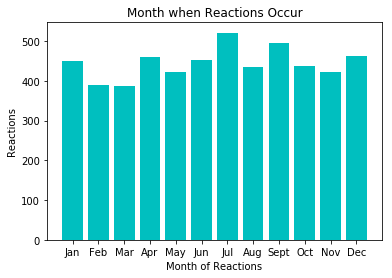

In [111]:
reactions_by_gender = event_df.groupby(["Gender"]).count()
month_groups = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
num_reactions = [451, 390, 388, 461, 423, 452, 521, 434, 495, 437, 423, 462]
x_axis = np.arange(len(num_reactions))
plt.bar(x_axis, num_reactions, color="c", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, month_groups)
plt.title("Month when Reactions Occur")
plt.xlabel("Month of Reactions")
plt.ylabel("Reactions")
plt.savefig("Reactions_Month.png")
plt.show()


#### Increased/Decreased over the years

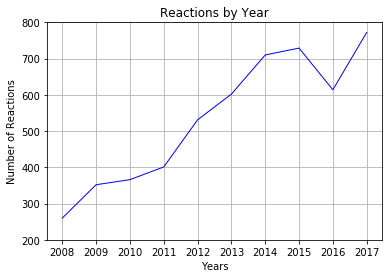

In [121]:
y = 260, 352, 366, 401, 531, 602, 710, 729, 614, 772
x = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
plt.ylim(200,800)
plt.plot(x, y, color="blue", linewidth=1, label="Reactions")
plt.xlabel("Years")
plt.ylabel("Number of Reactions")
plt.title("Reactions by Year")
plt.grid()
plt.savefig("Reactions_Year.png")
plt.show()

#### Reactions by Gender

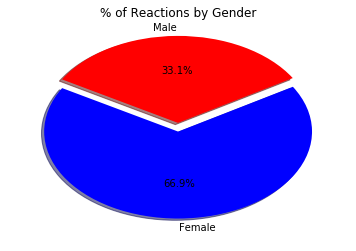

In [107]:
Genders = event_df["Gender"].value_counts()

labels = ["Female", "Male"]
colors = ["Blue", "Red"]
explode = (0, 0.1)
plt.pie(Genders, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Reactions by Gender")
plt.savefig("Reactions_Gender.png")
plt.show()

#### Reactions by Age

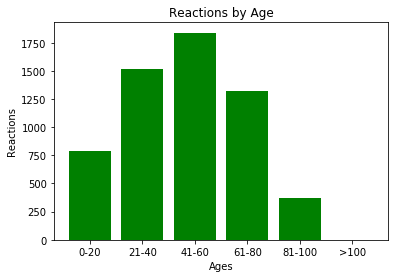

In [112]:
reactions_by_age = event_df.groupby(["Age Bin"]).count()
age_groups = ["0-20", "21-40", "41-60", "61-80", "81-100", ">100"]
num_reactions = [792, 1515, 1839, 1325, 367, 2]
x_axis = np.arange(len(num_reactions))
plt.bar(x_axis, num_reactions, color="g", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, age_groups)
plt.title("Reactions by Age")
plt.xlabel("Ages")
plt.ylabel("Reactions")
plt.savefig("Reactions_Age.png")
plt.show()